In [1]:
#imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 

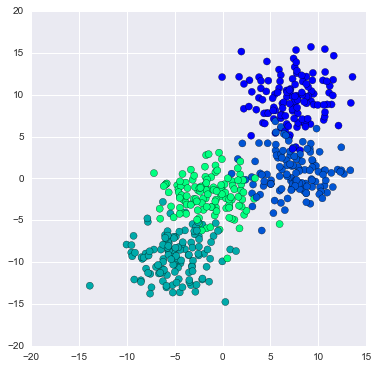

In [8]:
from sklearn.datasets import make_blobs
#using practice dataset from sklearn

X, y = make_blobs(n_samples=500, centers=4, random_state=8, cluster_std=2.4)
#can mess with cluster std

plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
#use meshgrid plotting with decision boundaries (used a lot in scikit documentation)

In [14]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
    #code here written by jmportilla
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1) aka grabs min and max
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables as tuple
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid, linear spaced linespace meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

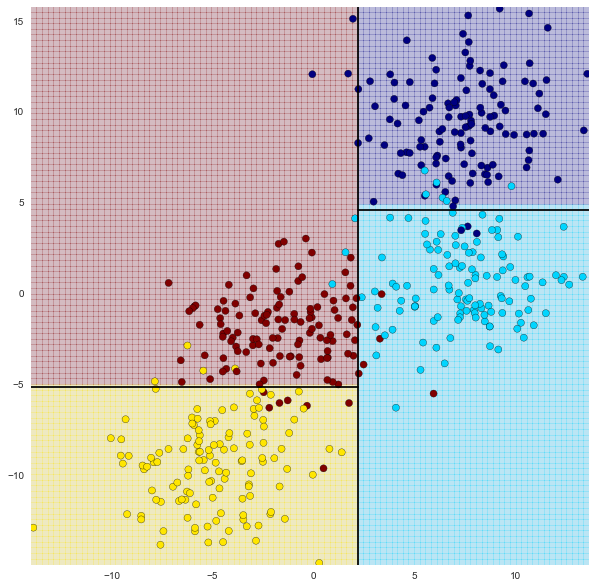

In [16]:
clf = DecisionTreeClassifier(max_depth = 2, random_state=0)

visualize_tree(clf,X,y)

In [17]:
#meshgrid shows us what the tree got right vs wrong. Some misssclassification but not much
#careful for overfitting. If we chaged the max depth by increasing it it gets better fitted for the data
#eventually you'll just fit boundaries over each point individually. 
#overfitting is a common issue in decision trees
#we can help deal with this common issue by creating an ensemble of decision trees (a random forrest). This average/ensemble
#is more robust in that sense.

In [18]:
#common ensemble method is random forrest (made up of many decision trees), lets use scikitlearn to do this

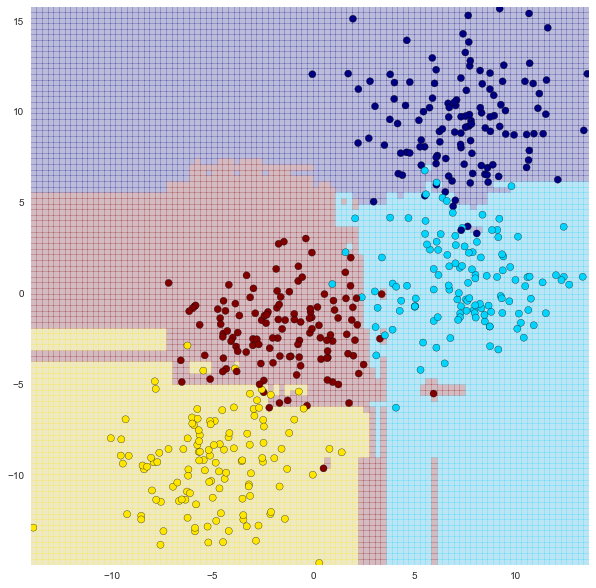

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)

visualize_tree(clf,X,y,boundaries=False)

In [22]:
#notice the features that the random forest picked up over the decisiontree

In [23]:
#usually somewhere between 100 and up to 400 trees (n_estimators) is good to use, any more than that and you're
#not actually gaining much more information just straining cpu

In [24]:
#lastly random forest regression
#imagine we have weather data that is sinusoidal in nature and has some noise to it

In [26]:
x = 10 * np.random.rand(100)

In [27]:
x

array([ 4.76638894,  2.85216904,  5.20517532,  2.91162201,  0.07245278,
        0.9026732 ,  0.10748787,  1.0779701 ,  2.16736769,  0.87778349,
        6.67481516,  0.77277014,  7.78812445,  1.43736218,  6.90974073,
        6.4769409 ,  7.37174921,  1.09617966,  3.35254672,  0.31652323,
        6.88143051,  5.98196683,  9.87119108,  8.56432837,  6.47902818,
        9.73380772,  4.05144689,  9.23355297,  0.48259668,  7.77592311,
        0.33274522,  9.70916371,  5.02354818,  1.24154799,  6.17073179,
        3.23065427,  7.27295405,  2.55120377,  1.68955858,  3.85319787,
        5.62311783,  4.01017672,  6.02820422,  4.4844018 ,  7.66038074,
        6.78371987,  0.63528352,  1.78257075,  6.98583269,  1.60568333,
        3.50215393,  8.16153647,  6.89653476,  0.69198173,  3.70156905,
        5.6328741 ,  0.35081059,  9.5611549 ,  5.62550349,  4.30219947,
        0.96484224,  2.12906358,  7.9553663 ,  3.44527178,  5.66427675,
        8.14668524,  4.98633498,  3.19299337,  8.23651501,  9.07

In [28]:
#create a function to make false sin data

In [29]:
def sin_model(x,sigma=0.2):
    #sigma is random noise
    noise = sigma * np.random.rand(len(x))
    
    return np.sin(5*x) + np.sin(0.5 * x) + noise

In [30]:
y = sin_model(x)

<Container object of 3 artists>

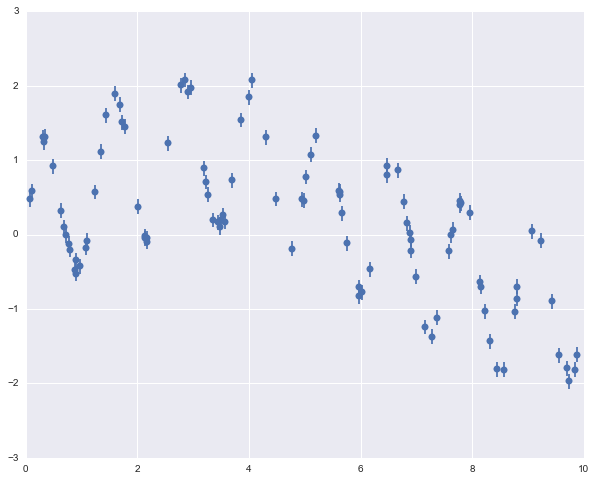

In [33]:
plt.figure(figsize=(10,8))
plt.errorbar(x,y,0.1,fmt='o')

In [34]:
#shows our fake data with error bars (just for the sake of showing trend)

In [35]:
#part of a large sinusoidal occilating line

In [36]:
#think of this as wheather data (maybe co2 in atmosphere), where a linear model wouldn't do

In [39]:
#what's nice about random forest regression, you don't need to know much about the data's trends or pattern and
#still be able to fit a regression to it
#it's usually used in classifying data but also powerful for regression

In [42]:
from sklearn.ensemble import RandomForestRegressor

xfit = np.linspace(0,10,1000)



In [44]:
rfr = RandomForestRegressor(100)
#100 estimators

rfr.fit(x[:,None],y)
#fit to our x data we created before, and format correctly using brackets
yfit = rfr.predict(xfit[:,None])

In [46]:
#plot against real model
ytrue = sin_model(xfit,0)

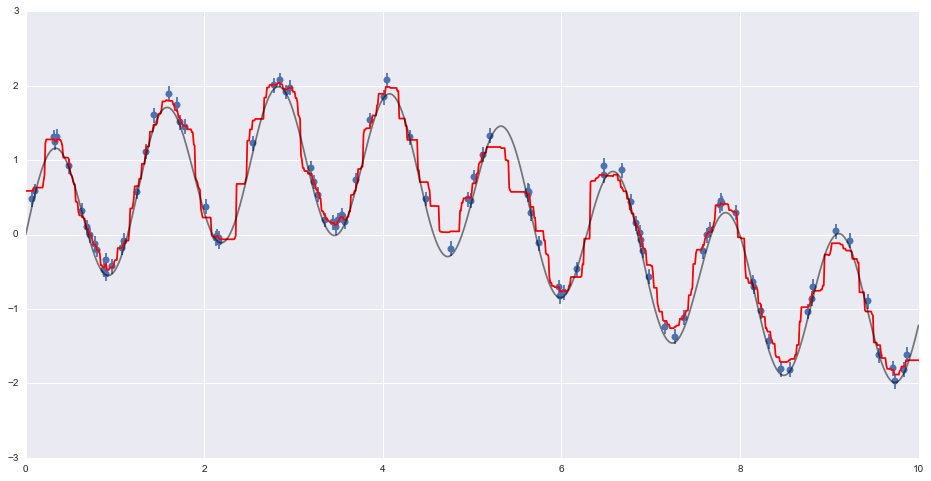

In [48]:
plt.figure(figsize = (16,8))

plt.errorbar(x,y,0.1,fmt='o')

plt.plot(xfit,yfit,'-r')

plt.plot(xfit,ytrue, 'k', alpha=0.5)

In [49]:
#have our original data points and our red line which is our model
#really good fit considering we didn't tell it anything about our data, and it's still able to come up with a very good fit

In [50]:
#non parametric random tree model is really good

In [51]:
#great reasources for this:
#wiki has great resources and boosting and other extensions of the general mathematics
#kaggle has an overview (Random Forest is a trademark term surprisingly)
#A whole webpage by the inventors themselves